In [1]:
import pyreadstat
import os
import gc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

.sav ===> import pyreadstat, pyreadstat.read_sav(file_path)

.sas7bdat  ====> pandas, pd.read_sas(file_path)

.dta  ===> pd.read_stata(file_path)

Target 2nd Work

W21Q15A1, W21Q15B1, W21Q15C1, W21Q15D1, W21Q15E1

W21Q15A2, W21Q15B2, W21Q15C2, W21Q15D2, W21Q15E2

In [354]:
import xgboost as xgb
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report


def XGBoost_binary(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

    params = {'objective': 'binary:logistic',  # Binary classification
              'eval_metric': 'logloss'         # Logarithmic loss
             }

    dtrain = xgb.DMatrix(X_train, label=y_train)
    dtest = xgb.DMatrix(X_test, label=y_test)

    num_rounds = 300  
    model = xgb.train(params, dtrain, num_rounds)

    y_pred_proba = model.predict(dtest)
    y_pred = [1 if pred > 0.5 else 0 for pred in y_pred_proba]  # Convert probabilities to class labels

    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)
    
    return accuracy, model

In [361]:
def XGBoost_multiclass(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

    params = {
        'objective': 'multi:softmax',  # Multi-class classification
        'num_class': len(set(y)),      # Number of classes
        'eval_metric': 'merror'         # Error rate (1-accuracy)
    }
    
    dtrain = xgb.DMatrix(X_train, label=y_train)
    dtest = xgb.DMatrix(X_test, label=y_test)

    num_rounds = 300
    model = xgb.train(params, dtrain, num_rounds)
    y_pred = model.predict(dtest)

    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)
    feature_importance = model.get_score(importance_type='weight')

    feature_importance = {k: v for k, v in sorted(feature_importance.items(), key=lambda item: item[1], reverse=True)}

    plt.figure(figsize=(10, 6))
    plt.barh(range(len(feature_importance)), list(feature_importance.values()), align='center')
    plt.yticks(range(len(feature_importance)), list(feature_importance.keys()))
    plt.xlabel('Feature Importance')
    plt.ylabel('Feature')
    plt.title('Feature Importance Plot')
    plt.show()    
    
    return accuracy, feature_importance

In [4]:
def call_df():
    path = 'C:/Users/hml76/Desktop/UMN/연구/HRD_Minjeong/Data/HCCPII_20230828/'
    file_path = path+'2. SPSS/HCCP_2ndWave_Work_1st.sav'

    df, meta = pyreadstat.read_sav(file_path)
    columns_to_drop0 = ['W20ID2', 'W20ID3']
    df = df.drop(columns=columns_to_drop0)
    
    #y = df[y_name]
    #df.drop(columns=[y_name])
    gc.collect()
    return df

# 첫번째 거른거

In [6]:
lst_R1 = ['W20IND1', 'W20SCALE', 'W20Q01B', 'W20Q02B', 'W20Q03A', 'W20Q03B', 'W20Q04', 'W20Q05B', 'W20Q061A', 'W20Q061B', 
'W20Q061C', 'W20Q061D', 'W20Q062A', 'W20Q062B', 'W20Q062C', 'W20Q062D', 'W20Q07', 'W20Q081A', 'W20Q081B', 'W20Q081C', 
'W20Q081D', 'W20Q081E', 'W20Q082A', 'W20Q082B', 'W20Q082C', 'W20Q082D', 'W20Q082E', 'W20Q083A', 'W20Q083B', 'W20Q083C', 
'W20Q083D', 'W20Q083E', 'W20Q09A', 'W20Q09B', 'W20Q09C', 'W20Q09D', 'W20Q09E', 'W20Q09F', 'W20Q09G', 'W20Q09H', 'W20Q10A', 
'W20Q10B', 'W20Q10C', 'W20Q10D', 'W20Q11A1', 'W20Q11B1', 'W20Q11A2', 'W20Q11B2', 'W20Q12A', 'W20Q12B', 'W20Q12C', 'W20Q13',
'W20Q14A', 'W20Q14B', 'W20Q14C', 'W20Q14D', 'W20Q14E', 'W20Q14F', 'W20Q15A1', 'W20Q15B1', 'W20Q15C1', 'W20Q15D1', 'W20Q15E1',
'W20Q15A2', 'W20Q15B2', 'W20Q15C2', 'W20Q15D2', 'W20Q15E2', 'W20Q16A1', 'W20Q16A2', 'W20Q17', 'W20Q18A', 'W20Q18B', 'W20Q19',
'W20Q191', 'W20Q192', 'W20Q20', 'W20Q21', 'W20Q22A', 'W20Q22B', 'W20Q22C', 'W20Q22D', 'W20Q22E', 'W20Q22F', 'W20Q23A',
'W20Q23B', 'W20Q23C', 'W20Q23D', 'W20Q24A', 'W20Q24B', 'W20Q24C', 'W20Q24D', 'W20Q24E', 'W20Q24F', 'W20Q25A', 'W20Q25B', 
'W20Q25C', 'W20Q25D', 'W20Q25E', 'W20Q25F', 'W20Q25G', 'W20Q25H', 'W20Q25I', 'W20Q25J', 'W20Q25K', 'W20Q25L', 'W20Q26A', 
'W20Q26B', 'W20Q26C', 'W20Q261', 'W20Q27A', 'W20Q27B', 'W20Q27C', 'W20Q27D', 'W20Q27E', 'W20Q27F', 'W20Q27G', 'W20Q28', 
'W20Q29', 'W20Q302', 'W20DQ01', 'W20DQ02B', 'W20DQ03', 'W20DQ04', 'W20DQ041']

In [7]:
df = call_df()

nan_values = df.isna()
nan_count_per_column = nan_values.sum()
Nan_cols = []
columns_with_nan = nan_count_per_column[nan_count_per_column > 0]  # Filter columns with NaN values
print("Columns with NaN values and count of NaN values:")
for column, count in columns_with_nan.items():
    print(f"Column '{column}' has {count} NaN value(s).")
    Nan_cols.append(column)    
    
filtered_list = [x for x in lst_R1 if x not in Nan_cols]    

Columns with NaN values and count of NaN values:
Column 'W20Q11A2' has 2932 NaN value(s).
Column 'W20Q11B2' has 3144 NaN value(s).
Column 'W20Q15A2' has 4277 NaN value(s).
Column 'W20Q15B2' has 3749 NaN value(s).
Column 'W20Q15C2' has 3330 NaN value(s).
Column 'W20Q15D2' has 5242 NaN value(s).
Column 'W20Q15E2' has 6775 NaN value(s).
Column 'W20Q16A2' has 6627 NaN value(s).
Column 'W20Q16B2' has 9047 NaN value(s).
Column 'W20Q16C2' has 9053 NaN value(s).
Column 'W20Q16D2' has 9053 NaN value(s).
Column 'W20Q191' has 5927 NaN value(s).
Column 'W20Q192' has 5927 NaN value(s).
Column 'W20Q31A' has 1737 NaN value(s).
Column 'W20Q31B' has 7187 NaN value(s).
Column 'W20DQ041' has 1532 NaN value(s).


In [ ]:
'''for i in range(len(lst_R1)):
    print(df[lst_R1[i]].value_counts(), "\n")

In [ ]:
#그냥 그저 해볼만 한 레이블
[9, 10, 11, 12, 13, 14 ,15]

#진짜 괜찮은 레이블
[]

In [12]:
Result = []

In [277]:
cnt_value[1:3]

[3391, 1028]

In [293]:
idx = 53
DF = call_df()
DF[filtered_list[idx]].value_counts()

4.0    3484
3.0    3391
2.0    1028
5.0     844
1.0     306
Name: W20Q14D, dtype: int64

In [321]:
len(cnt_value)

4

In [326]:
DF = call_df()
idx = 53
Y = DF[filtered_list[idx]]
Y_idx = DF[filtered_list[idx]].value_counts().index.tolist()
Y_idx = [int(x) for x in Y_idx]
cnt_value = list(Y.value_counts())
if len(cnt_value) == 5:
    DF = DF[~((Y == 1) | (Y == 5))] #불필요한 레이블 삭제
    
    for i in range(1,6):
        if i == 5:
            cnt_value.remove(cnt_value[i-1])
            Y_idx.remove(5)
        elif i == 1:
            cnt_value.remove(cnt_value[i-2])
            Y_idx.remove(1)
            
Y_idx

IndexError: list index out of range

In [316]:
DF = call_df()
idx = 53
Y = DF[filtered_list[idx]]
Y_idx = DF[filtered_list[idx]].value_counts().index.tolist()
Y_idx = [int(x) for x in Y_idx]

cnt_value = list(Y.value_counts())


print(f"\nIndex {idx}  ========================\n", Y.value_counts()) #DF.shape

if len(cnt_value) == 5:
    DF = DF[~((Y == 1) | (Y == 5))] #불필요한 레이블 삭제
    
    for i in Y_idx:
        if i == 1:
            cnt_value.remove(cnt_value[i-1])
            Y_idx.remove(1)
        elif i == 5:
            cnt_value.remove(cnt_value[i-1])
            Y_idx.remove(5)
            
    N = min(cnt_value)
    N_idx = np.argmin(cnt_value) 
    
    print(cnt_value, Y_idx, N, N_idx)
    
    if N_idx in Y_idx:
        Y_idx.remove(N_idx)
    
    for L in Y_idx: #가장 적은 레이블 보다 큰 레이블들
        idx_with_condition = DF[Y == L].index
        random_idx = np.random.choice(idx_with_condition, size=(len(idx_with_condition)-N), replace=False) #랜덤이라 성능 차이가 좀날수도
        DF = DF.drop(random_idx)
        
    print(f"\nIndex {idx}  ========================\n", Y.value_counts())
    subtract = np.min(Y)
    y = Y-subtract

    DF = DF.drop(columns = [filtered_list[idx]])
    
        
#elif len(cnt_value) == 2:


Index 53  ========================
 4.0    3484
3.0    3391
2.0    1028
5.0     844
1.0     306
Name: W20Q14D, dtype: int64
[3484, 3391, 1028, 844] [4, 3, 2, 1] 844 3


C:\Users\hml76\AppData\Local\Temp\ipykernel_20640\2857853982.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  idx_with_condition = DF[Y == L].index
C:\Users\hml76\AppData\Local\Temp\ipykernel_20640\2857853982.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  idx_with_condition = DF[Y == L].index
C:\Users\hml76\AppData\Local\Temp\ipykernel_20640\2857853982.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  idx_with_condition = DF[Y == L].index


ValueError: 'a' cannot be empty unless no samples are taken

In [314]:
list(DF[filtered_list[idx]].value_counts())

[3391, 306, 306]

In [297]:
Y_idx

[4.0, 3.0, 2.0, 5.0, 1.0]

In [362]:
idx = 59
DF = call_df()
print(f"\nIndex {idx}  ========================\n", DF[filtered_list[idx]].value_counts()) #DF.shape


Index 59  ========================
 2.0    5242
1.0    3811
Name: W20Q15D1, dtype: int64


In [363]:
total_labels, Erased_labels = [1,2], []
#total_labels, Erased_labels = [2,3,4], [1,5,8]
#total_labels, Erased_labels = [2,3,4], [1,5]

#DF = DF[DF[filtered_list[idx]] != 2] #1이면 삭제
#DF = DF[~((DF[filtered_list[idx]] == Erased_labels[0]) | (DF[filtered_list[idx]] == Erased_labels[1]))] #불필요한 레이블 삭제
#DF = DF[~((DF[filtered_list[idx]] == Erased_labels[0]) | (DF[filtered_list[idx]] == Erased_labels[1]) | (DF[filtered_list[idx]] == Erased_labels[2]))] 

N = 3811 #가장 적은 레이블 수
 
for L in [2]: #가장 적은 레이블 보다 큰 레이블들
    idx_with_condition = df[df[filtered_list[idx]] == L].index
    random_idx = np.random.choice(idx_with_condition, size=(len(idx_with_condition)-N), replace=False) #랜덤이라 성능 차이가 좀날수도
    DF = DF.drop(random_idx)

print(f"\nIndex {idx}  ========================\n", DF[filtered_list[idx]].value_counts())

y = DF[filtered_list[idx]]
subtract = np.min(y)
y = y-subtract

DF = DF.drop(columns = [filtered_list[idx]])
DF.shape


Index 59  ========================
 2.0    3811
1.0    3811
Name: W20Q15D1, dtype: int64


(7622, 138)

59
Accuracy: 1.0


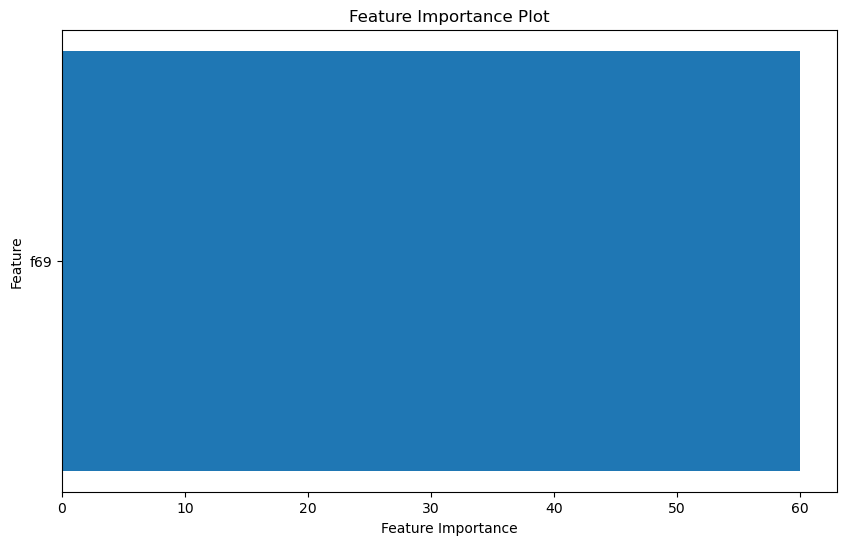

In [364]:
print(idx)
acc, xgb_model_ = XGBoost_multiclass(np.array(DF), y)

In [360]:
importance = xgb_model_.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importance})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print("Feature Importance:")
print(feature_importance_df)

AttributeError: 'Booster' object has no attribute 'feature_importances_'

In [348]:
Result.append((idx, acc, total_labels, filtered_list[idx]))
gc.collect()
del DF, idx, y

In [ ]:
#성능은 설문조사의 신뢰도와 직결하는 듯함 (보통 3,4,5가 높으면 성능이 확실히 낮은듯)

#기존의 설문조사자체의 tendency(Bias)를 뺀다?

In [353]:
len(Result)

46

In [366]:
idx = 59
DF = call_df()
print(f"\nIndex {idx}  ========================\n", DF[filtered_list[idx]].value_counts()) #DF.shape


Index 59  ========================
 2.0    5242
1.0    3811
Name: W20Q15D1, dtype: int64


In [367]:
total_labels, Erased_labels = [1,2], []
N = 3811 #가장 적은 레이블 수
 
for L in [2]: #가장 적은 레이블 보다 큰 레이블들
    idx_with_condition = df[df[filtered_list[idx]] == L].index
    random_idx = np.random.choice(idx_with_condition, size=(len(idx_with_condition)-N), replace=False) #랜덤이라 성능 차이가 좀날수도
    DF = DF.drop(random_idx)

print(f"\nIndex {idx}  ========================\n", DF[filtered_list[idx]].value_counts())

y = DF[filtered_list[idx]]
subtract = np.min(y)
y = y-subtract

DF = DF.drop(columns = [filtered_list[idx]])
DF.shape


Index 59  ========================
 2.0    3811
1.0    3811
Name: W20Q15D1, dtype: int64


(7622, 138)

In [368]:
X = DF

In [379]:
X_train

,W20ID1,W20IND1,W20SCALE,W20Q01A,W20Q01B,W20Q02A,W20Q02B,W20Q03A,W20Q03B,W20Q04,...,W20Q301,W20Q302,W20Q31A,W20Q31B,W20DQ01,W20DQ02A,W20DQ02B,W20DQ03,W20DQ04,W20DQ041
1871,325.0,1.0,1.0,2006.0,5.0,2012.0,3.0,5.0,6.0,12.0,...,40.0,7.0,9500.0,NaN,1.0,1969.0,9.0,2.0,5.0,2.0
4777,1318.0,1.0,1.0,2016.0,11.0,2020.0,1.0,1.0,3.0,1.0,...,40.0,0.0,4000.0,NaN,1.0,1991.0,11.0,1.0,5.0,3.0
5450,1794.0,1.0,1.0,2011.0,1.0,2013.0,2.0,1.0,8.0,20.0,...,40.0,1.0,3000.0,NaN,2.0,1961.0,8.0,2.0,2.0,NaN
1199,212.0,1.0,2.0,1989.0,3.0,2013.0,1.0,1.0,5.0,16.0,...,40.0,0.0,4600.0,NaN,1.0,1966.0,3.0,1.0,3.0,NaN
1786,305.0,1.0,2.0,1997.0,11.0,2015.0,4.0,1.0,6.0,11.0,...,40.0,0.0,7650.0,NaN,1.0,1974.0,7.0,2.0,5.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6170,2365.0,1.0,1.0,2020.0,4.0,2020.0,4.0,3.0,3.0,4.0,...,40.0,0.0,NaN,250.0,2.0,1985.0,8.0,1.0,5.0,1.0
6366,2559.0,1.0,1.0,2020.0,8.0,2020.0,8.0,4.0,4.0,4.0,...,40.0,5.0,NaN,360.0,1.0,1979.0,8.0,2.0,4.0,4.0
1003,179.0,1.0,1.0,2012.0,2.0,2017.0,12.0,1.0,4.0,12.0,...,40.0,5.0,4370.0,NaN,1.0,1979.0,11.0,1.0,5.0,2.0
9031,4061.0,1.0,1.0,2012.0,11.0,2019.0,1.0,1.0,3.0,4.0,...,40.0,3.0,2950.0,NaN,2.0,1995.0,1.0,1.0,5.0,1.0


Accuracy: 1.0


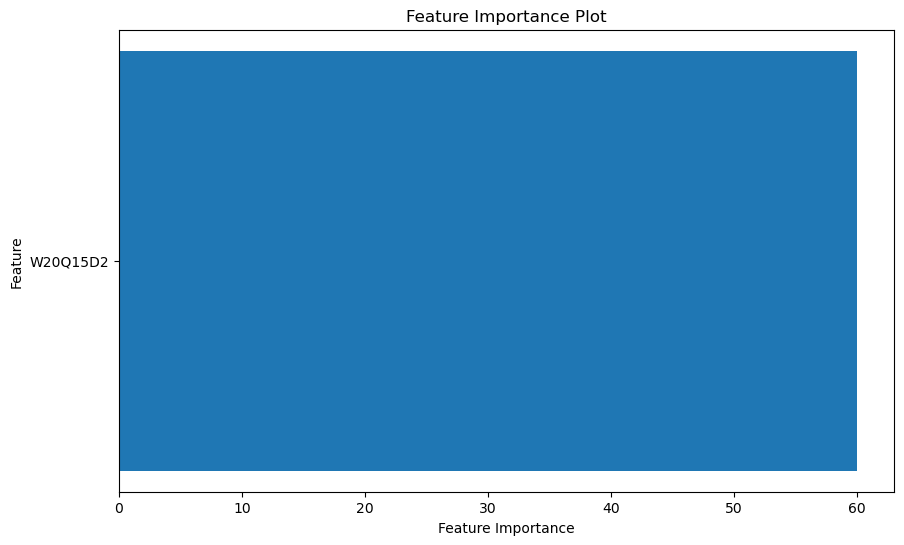

In [386]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

params = {
    'objective': 'multi:softmax',  # Multi-class classification
    'num_class': len(set(y)),      # Number of classes
    'eval_metric': 'merror'         # Error rate (1-accuracy)
}

dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

num_rounds = 300
model = xgb.train(params, dtrain, num_rounds)
y_pred = model.predict(dtest)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
feature_importance = model.get_score(importance_type='weight')

#feature_importance = {k: v for k, v in sorted(feature_importance.items(), key=lambda item: item[1], reverse=True)}

plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_importance)), list(feature_importance.values()), align='center')
plt.yticks(range(len(feature_importance)), list(feature_importance.keys()))
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance Plot')
plt.show()    

In [382]:
model.feature_importances_

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.], dtype=float32)